# Preprocess


In [25]:
using Statistics, LinearAlgebra, Random, DataFrames, Plots, StatsPlots, CSV, JSON, Dates

In [76]:
data = CSV.read("movies_metadata.csv");

thread = 1 warning: only found 10 / 24 columns on data row: 19730. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 19731. Filling remaining columns with `missing`
thread = 1 warning: only found 10 / 24 columns on data row: 29503. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 29504. Filling remaining columns with `missing`
thread = 1 warning: only found 10 / 24 columns on data row: 35587. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 35588. Filling remaining columns with `missing`


In [28]:
names(data)

24-element Array{Symbol,1}:
 :adult                
 :belongs_to_collection
 :budget               
 :genres               
 :homepage             
 :id                   
 :imdb_id              
 :original_language    
 :original_title       
 :overview             
 :popularity           
 :poster_path          
 :production_companies 
 :production_countries 
 :release_date         
 :revenue              
 :runtime              
 :spoken_languages     
 :status               
 :tagline              
 :title                
 :video                
 :vote_average         
 :vote_count           

In [29]:
"Computes a onehot vector for every entry in column given a set of categories cats"
function onehot(column, cats=unique(column))
    result = zeros(size(column)[1], size(cats)[1])
    new_cats = Dict()
    for (n, f) in enumerate(cats)
       new_cats[f] = n
    end
    
    for i in 1:size(column)[1]
        index = get(new_cats, column[i], 0)
        if index != 0
            result[i, index] = 1
        end
    end
    result
end

onehot

In [30]:
"Computes a manyhot vector for every entry in an array of arrays given a set of categories cats"
function manyhot(column)
    cats = Set()
    for set in column
        for item in set
            push!(cats, item)
        end
    end
    cats = unique(cats)
    
    result = zeros(size(column)[1], size(cats)[1])
    new_cats = Dict()
    for (n, f) in enumerate(cats)
       new_cats[f] = n
    end
    
    for i in 1:size(column)[1]
        set_of_descriptions = Set(column[i])
        for description in set_of_descriptions
            index = get(new_cats, description, 0)
            if index != 0
                result[i, index] = 1
            end
        end
    end
    result
end

manyhot

### Preprocess genre using many-hot encoding

In [31]:
function preprocess_json(d)
    if ismissing(d) || d == "False"
        return Set()
    end
    x = d
    x = replace(x, "\"" => "\'")
    x = replace(x, "\\xa0" => " ")
    x = replace(x, "'name'" => "\"name\"")
    x = replace(x, "'id'" => "\"id\"")
    x = replace(x, ": '" => ": \"")
    x = replace(x, "'}" => "\"}")
    x = replace(x, "'," => "\",")
    x = replace(x, "Orlenok\"" => "Orlenok'")
    x = replace(x, "'iso_3166_1'" => "\"iso_3166_1\"")
    result = Set{String}()
    try
        for dic in JSON.parse(x)
            push!(result, dic["name"])
        end
    catch err
        println(d)
        println(x)
        println("=============================")
        return Set()
    end
    return result
end

preprocess_json (generic function with 1 method)

In [32]:
genres = manyhot(map(preprocess_json,data[:,:genres]))

45466×32 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1

### Preprocess production company using many-hot encoding

In [33]:
production_companies = manyhot(map(preprocess_json,data[:,:production_companies]))
size(production_companies)

(45466, 23537)

There are so many production companies and we don't want to overfit our data, so we exclude it for now.

### Production countries using many-hot encoding

In [34]:
production_countries = manyhot(map(preprocess_json,data[:,:production_countries]))

4.3
4.3
6.0
6.0
7.0
7.0


45466×160 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

### Preprocess popularity to float type

In [35]:
function parse_string_to_float(x)
    if ismissing(x)
        return 0
    end
    result = 0
    try
        result = parse(Float64, x)
    catch
        println(x)
        println("=========")
    end
    return result
end

parse_string_to_float (generic function with 1 method)

In [36]:
popularity = map(parse_string_to_float,data[:,:popularity])

Beware Of Frost Bites


45466-element Array{Real,1}:
 21.946943
 17.015539
 11.7129  
  3.859495
  8.387519
 17.924927
  6.677277
  2.561161
  5.23158 
 14.686036
  6.318445
  5.430331
 12.140733
  ⋮       
  0.139936
  0.225051
  0.222814
  0.076061
  0.38645 
  0.661558
  5.683753
  0.072051
  0.178241
  0.903007
  0.003503
  0.163015

### Preprocess budget with boolean encoding

In [37]:
budget = data[:,:budget]
Random.seed!(3)
randlist = filter(x -> x != "0", data[:,:budget])
rand_num = length(randlist)
budget_rep = replace(budget, "/ff9qCepilowshEtG2GYWwzt2bs4.jpg"=>"0")
budget_rep = replace(budget_rep, "/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg"=>"0")
budget_rep = replace(budget_rep, "/zaSf5OG7V8X8gqFvly88zDdRm46.jpg"=>"0")
budget_rep = replace(budget_rep, "0"=>randlist[rand(1:rand_num)], NaN=>randlist[rand(1:rand_num)])
budget_repint = parse.(Float64, string.(budget_rep)) / 10^6
n = length(budget_repint)
budget_feature = zeros(n, 2)
for r in 1:n
    if budget_repint[r] > 20
        budget_feature[r,:] = [1,1]
    elseif budget_repint[r] > 1
        budget_feature[r,:] = [1,0]
    else
        budget_feature[r,:] = [0,0]
    end
end

In [38]:
sum(budget_feature)/45466

1.8248141468349977

### Preprocess runtime using boolean encoding, change missing to mean value

In [39]:
time = data[:, :runtime]
valid = filter(x -> ! ismissing(x), time)
mean_val = mean(valid)
for i in 1:size(time, 1)
    if ismissing(time[i]) || time[i] == 0
        time[i] = mean_val
    end
end

min_val = minimum(time)
max_val = maximum(time)
q_val = quantile(time, [0.25, 0.5, 0.75])

runtime = zeros(size(time, 1), 3) # the new matrix with many code
for i in 1:size(time, 1)
    t = time[i]
    runtime[i, :] = Int.([t>=q_val[1], t>=q_val[2], t>=q_val[3]])
end
runtime

45466×3 Array{Float64,2}:
 0.0  0.0  0.0
 1.0  1.0  0.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 1.0  1.0  0.0
 1.0  0.0  0.0
 1.0  1.0  1.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0

### Preprocess runtime using one-hot encoding on month/quarter

In [48]:
date = data[:, :release_date]
months = Int.(zeros(size(date, 1)))
for i in 1:size(date, 1)
    x = date[i]
    if ismissing(x)
        months[i] = rand(1:12,1)[1]
    else
        months[i] = Dates.month(x)
    end
end

release_date = zeros(size(months, 1), 4)
for i in 1:length(months)
    d = months[i]
    release_date[i, :] = Int.([d in 1:3, d in 4:6, d in 7:9, d in 10:12])
end
release_date

45466×4 Array{Float64,2}:
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 ⋮                 
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0

# Experiment

### Compute true label y using IMDB's weighted rating

We use the TMDB Ratings to come up with our Top Movies Chart. We will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = ($\frac{v}{v+m}\times R + \frac{m}{v+m}\times C$)
, where

- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [166]:
vote_avg = data[:, :vote_average]
vote_c = data[:, :vote_count]
mean_c = mean(map(z -> ismissing(z) ? 0 : z, vote_c))
mean_a = mean(map(z -> ismissing(z) ? 0 : z, vote_avg))
vote_avg = map(z -> ismissing(z) ? mean_a : z, vote_avg)
vote_c = map(z -> ismissing(z) ? mean_c : z, data[:, :vote_count])
m = quantile(vote_c, 0.95)
C = mean(vote_avg)
v = vote_c
R = vote_avg
weighted_rat = (v./(v.+m) .* R) .+ (m./(m.+v) .* C)
y = copy(weighted_rat) .* 10

45466-element Array{Float64,1}:
 75.45611855033185 
 67.04697404803844 
 57.72510389206552 
 56.53227871994322 
 56.415283677385155
 73.10743544401484 
 57.6093490582922  
 55.976967877291784
 55.843641910741994
 63.38379565120776 
 58.955311531020854
 56.44889067379176 
 63.498072216228124
  ⋮                
 56.10779890132746 
 56.20829621351675 
 56.30554243634057 
 56.245492532997005
 56.21385479299241 
 56.133348755039556
 56.228327071785635
 56.14484961760425 
 56.41436375787852 
 55.93399288516986 
 56.182071172918604
 56.182071172918604

Therefore, to qualify to be considered for the chart, a movie has to have at least $m=434$ votes on TMDB. We also see that the average rating for a movie on TMDB is 56.18 on a scale of 0 to 100, and the average vote count is 109.897. Note that we have enlarged the rating scale by 10 times to make prediction MSE's more pronounced.

### Separate data into training and test dataset

In [132]:
function separate_dataset(y, dataset)
    Random.seed!(5)
    new_dataset = hcat(y, dataset)
    new_dataset = new_dataset[shuffle(1:end), :]
    
    train_proportion = 0.8
    n = size(dataset, 1)
    println("Size of dataset: ", string(n))
    
    ntrain = convert(Int, round(train_proportion*n))

    target = new_dataset[:, 1]
    train_x = new_dataset[1:ntrain, 2:end]
    test_x = new_dataset[ntrain+1:end, 2:end]
    train_y = target[1:ntrain, :]
    test_y = target[ntrain+1:end, :]
    return train_x, train_y, test_x, test_y
end

separate_dataset (generic function with 1 method)

### Calculate least square

In [61]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    n = size(y)[1]
    err = 0
    for i in 1:n
        err += (y[i] - pred[i])^2
    end
    return err/n
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [62]:
function calculate_MSE(train_x, train_y, test_x, test_y)
    # The weights of your linear equation (compute via least squares)
    w = train_x\train_y

    train_pred = train_x*w
    test_pred = test_x*w

    train_MSE = MSE(train_y, train_pred)
    test_MSE = MSE(test_y, test_pred)
    
    println("Train MSE\t", train_MSE)
    println("Test MSE \t", test_MSE)
    return test_pred
end

calculate_MSE (generic function with 1 method)

### First, let's see how individual feature performs

In [170]:
# 建议不要跑 电脑可能会炸😂
# println("Feature: Production Countries")
# dataset = hcat(ones(size(data,1)), production_countries)
# train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
# test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
# println("=====================")

In [167]:
println("Feature: Budget")
dataset = hcat(ones(size(data,1)), budget_feature)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
println("=====================")
println("Feature: Popularity")
dataset = hcat(ones(size(data,1)), popularity)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
println("=====================")
println("Feature: Release Date")
dataset = hcat(ones(size(data,1)), release_date)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
println("=====================")
println("Feature: Runtime")
dataset = hcat(ones(size(data,1)), runtime)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
println("=====================")
println("Feature: Genres")
dataset = hcat(ones(size(data,1)), genres)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
println("=====================")

Feature: Budget
Size of dataset: 45466
Train MSE	5.128085238444738
Test MSE 	5.660912891713659
Feature: Popularity
Size of dataset: 45466
Train MSE	4.264342182277157
Test MSE 	4.374981039901171
Feature: Release Date
Size of dataset: 45466
Train MSE	5.322853812303397
Test MSE 	5.841982185907512
Feature: Runtime
Size of dataset: 45466
Train MSE	5.027978309315421
Test MSE 	5.522348860241008
Feature: Genres
Size of dataset: 45466
Train MSE	5.099188546539677
Test MSE 	5.619167272555822


### Popularity and Runtime have the lowest MSE's, so we fit a model using these two

In [174]:
println("Model 1: Popularity + Runtime")
dataset = hcat(ones(size(data,1)), popularity, runtime)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
w1 = train_x\train_y
println("=====================")

Model 1: Popularity + Runtime
Size of dataset: 45466
Train MSE	4.103380228647832
Test MSE 	4.23045785713107


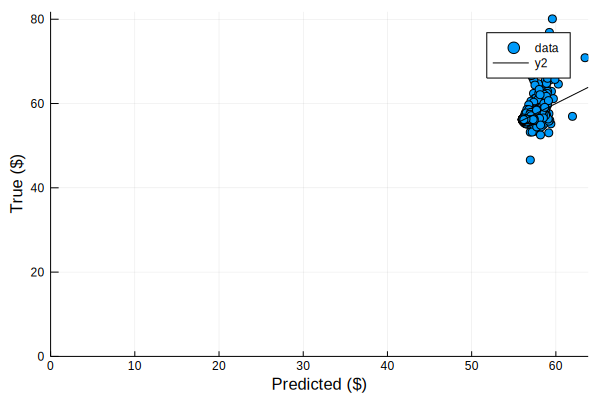

In [175]:
plot_pred_true(test_pred, test_y) # 最好能在plot function里加个设axis的 不然data坨成一坨

### Better than using Popularity along. Now we add in Genres.

In [186]:
println("Model 2: Popularity + Runtime + Genres")
dataset = hcat(ones(size(data,1)), popularity, runtime, genres)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
w2 = train_x\train_y
println("=====================")

Model 2: Popularity + Runtime + Genres
Size of dataset: 45466
Train MSE	1.8629109391095477e28
Test MSE 	1.5458292705479402e26


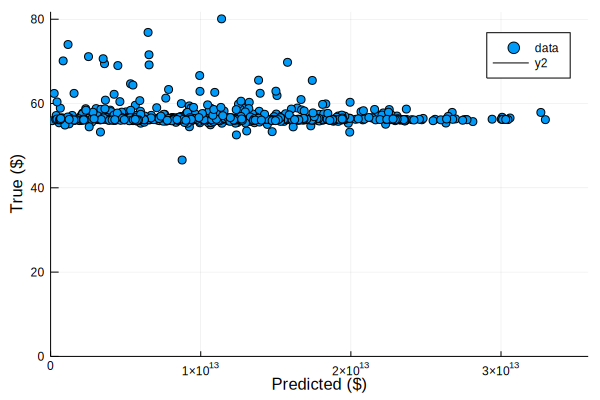

In [177]:
plot_pred_true(test_pred, test_y)

### Much better! Now add in Budget

In [180]:
println("Model 3: Popularity + Runtime + Genres + Budget")
dataset = hcat(ones(size(data,1)), popularity, runtime, genres, budget_feature)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
w3 = train_x\train_y
println("=====================")

Model 3: Popularity + Runtime + Genres + Budget
Size of dataset: 45466
Train MSE	9.748776760283533
Test MSE 	4.122802151723631


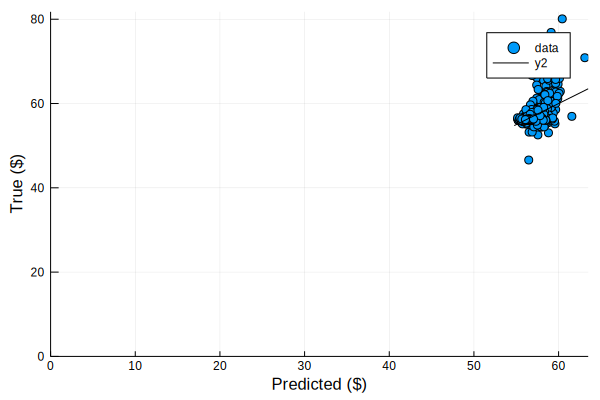

In [181]:
plot_pred_true(test_pred, test_y)

### Budget makes prediction worse. Remove Budget and try Release Date instead.

In [183]:
println("Model 4: Popularity + Runtime + Genres + Release Date")
dataset = hcat(ones(size(data,1)), popularity, runtime, genres, release_date)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
w4 = train_x\train_y
println("=====================")

Model 4: Popularity + Runtime + Genres + Release Date
Size of dataset: 45466
Train MSE	197.42321687536017
Test MSE 	4.153835394470385


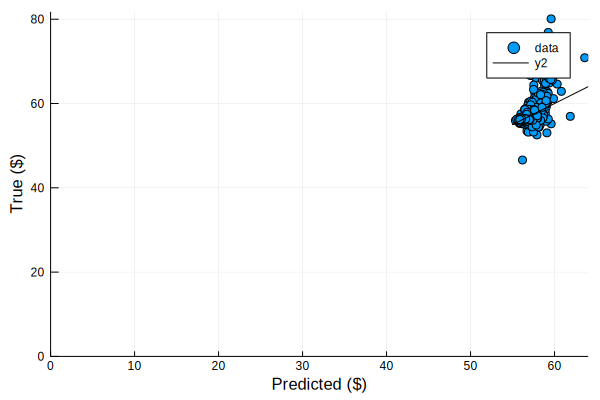

In [184]:
plot_pred_true(test_pred, test_y)

### Not as good as Model 2 -- Genres + Popularity + Runtime seem the best so far

### First, let's try all the small features to avoid overfitting (exclude production countries and production companies)

In [61]:
dataset = hcat(ones(size(data,1)), budget_feature, popularity, release_date, runtime, genres)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)
plot_pred_true(test_pred, test_y)

Size of dataset: 45466


SingularException: SingularException(42)

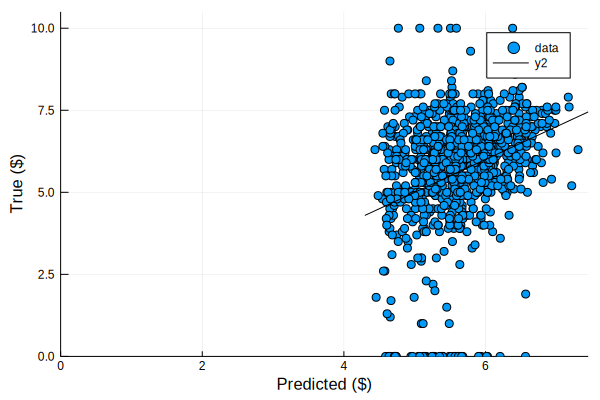

In [50]:
plot_pred_true(test_pred, test_y)

### Let's then try without genre which has 32 columns

In [51]:
dataset = hcat(ones(size(data,1)), budget_feature, popularity, release_date, runtime)
println(size(dataset))
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y);

(45466, 11)
Size of dataset: 45466
Train MSE	3.5477833307510993
Test MSE 	3.4164692282412346


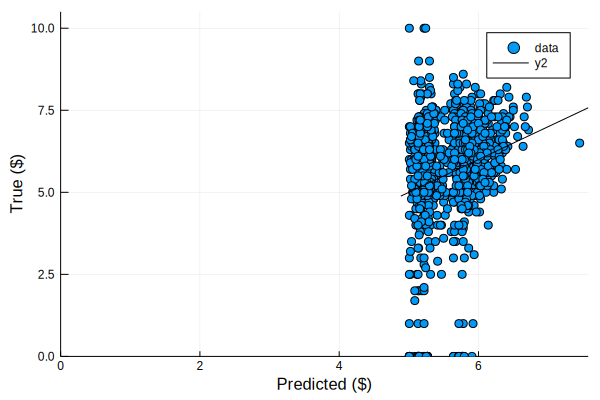

In [52]:
plot_pred_true(test_pred, test_y)

### Since the result with genres in the feature set does better than without, let's try adding production countries (160 columns)

In [53]:
dataset = hcat(ones(size(data,1)), production_countries)
println(size(dataset))
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)

(45466, 161)
Size of dataset: 45466


SingularException: SingularException(160)

In [162]:
factorize(production_countries)

QRPivoted{Float64,Array{Float64,2}}
Q factor:
45466×45466 LinearAlgebra.QRPackedQ{Float64,Array{Float64,2}}:
 -0.00687565  -0.000809416  -0.000268892  …  -0.000239043  -1.05058e-5 
 -0.00687565  -0.000809416  -0.000268892     -7.51847e-5    0.0157091  
 -0.00687565  -0.000809416  -0.000268892     -1.19805e-5   -0.00154452 
 -0.00687565  -0.000809416  -0.000268892     -1.32786e-5   -0.00136451 
 -0.00687565  -0.000809416  -0.000268892      9.47434e-6   -0.000236983
 -0.00687565  -0.000809416  -0.000268892  …  -2.43122e-5   -0.000577174
 -0.00687565  -0.000809416  -0.000268892     -1.23647e-7   -0.000180694
 -0.00687565  -0.000809416  -0.000268892     -6.32187e-6   -0.000415827
 -0.00687565  -0.000809416  -0.000268892      0.0331256    -1.39416e-5 
 -0.00687565   0.0149273    -0.00180249       1.44981e-5   -0.000499399
 -0.00687565  -0.000809416  -0.000268892  …  -7.79179e-5   -3.80673e-5 
 -0.00687565  -0.000809416   0.0157582       -0.000205028  -0.000166957
 -0.00687565  -0.000809416 